# **Netflix Case Study**

In [ ]:
!gdown "1FnduGdF8Bwz-1vxzlNKKzXl9DCMxDoob"

Downloading...
From: https://drive.google.com/uc?id=1FnduGdF8Bwz-1vxzlNKKzXl9DCMxDoob
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 117MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Netfilx Data
df_netflix = pd.read_csv("netflix.csv")
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Basic Analysis**

# 1. Defining Problem Statement and Analysing basic metrics

**1. Defining Problem Statement and Analysing basic metrics**

In [ ]:
rows, columns = df_netflix.shape

print("Number of Rows:", rows)
print("Number of Columns:",columns )

Number of Rows: 8807
Number of Columns: 12


**8807** Rows and **12** Columns are present in this data

**Columns and details of the data set:**

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix (in YYYY-MM-DD format)
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes for movies, or number of seasons for TV shows
- Listed_in: Genre
- Description: The summary description

In [ ]:
df_netflix.show_id.count()

8807

In [ ]:
df_netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Distribution of Content Types: Movie vs. TV Show')

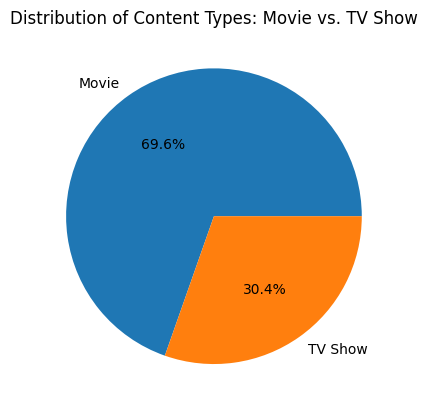

In [ ]:
x = df_netflix.type.value_counts().values
labels = df_netflix.type.value_counts().index
plt.pie(x=x,labels = labels,autopct='%1.1f%%')
plt.title("Distribution of Content Types: Movie vs. TV Show")

In the dataset, there are **6,131 entries corresponding to movies** and  **2,676 entries corresponding to TV shows**, making a **total of 8,807 entries**.Notably, **movies constitute the majority, accounting for 69.6% of the dataset**.

In [ ]:
# Number of directors  in the dataset
print("Number of unique Directors: ",df_netflix.director.nunique())
print("Number of NaN values in Director column:",df_netflix.director.isnull().sum())

Number of unique Directors:  4528
Number of NaN values in Director column: 2634


The dataset contains information for **4,528 unique directors**.

In [ ]:

top3_countries = df_netflix.country.value_counts()[:3]
top3_countries

United States     2818
India              972
United Kingdom     419
Name: country, dtype: int64

It appears that the United States (US), **India, and the United Kingdom (UK) are the top three countries** with the highest number of movies and TV shows released in the dataset.

In [ ]:
min_date_added = pd.to_datetime(df_netflix['date_added']).min()
max_date_added = pd.to_datetime(df_netflix['date_added']).max()
print("Starting Date:",min_date_added)
print("Ending Date:",max_date_added)

Starting Date: 2008-01-01 00:00:00
Ending Date: 2021-09-25 00:00:00


The dataset includes content added to Netflix from **January 1, 2008**, to **September 25, 2021**, encompassing the range of starting and ending dates for the **"date_added"** column.

In [ ]:
min_released_year = df_netflix['release_year'].min()
max_released_year = df_netflix['release_year'].max()
print("Starting Year:",min_released_year)
print("Ending Year:",max_released_year)

Starting Year: 1925
Ending Year: 2021


The dataset includes content released to cinemas spanning from the **year 1925 to 2021**, encompassing the range of starting and ending dates for the "**release_year**" column.

In [ ]:
df_netflix["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

The dataset encompasses a variety of content ratings denoting the suitability of the audience. These ratings, ranging from TV-MA for mature audiences to TV-Y for all children, provide guidance on the intended viewership age groups and content appropriateness.

Additionally, there are instances of values such as 74 minutes, 84 minutes, and 66 minutes in the "rating" column, which appear to be more suited for the "duration" column.


In [ ]:
mismatched_duration = df_netflix.loc[df_netflix.rating.isin(["74 min","84 min","66 min"])]

It clearly shows duration value are wrongly entered in rating column. Lets Move the values to duration column


In [ ]:

df_netflix.loc[mismatched_duration.index, "duration"] = mismatched_duration["rating"]
df_netflix.loc[mismatched_duration.index, "rating"] = np.nan

df_netflix.loc[mismatched_duration.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df_netflix["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

We have now relocated the rating values to the duration column, where they were mistakenly entered.

# 2.  Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary

**2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary**

In [ ]:

# Exploring the column data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#date_added column seems to be object type, Lets change in to date format
df_netflix["date_added"]= pd.to_datetime(df_netflix["date_added"])
df_netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

The 'date_added' column has been successfully converted to a datetime format. This conversion enables the utilization of datetime functions, facilitating more sophisticated analysis based on this temporal information.

In [ ]:
# Checking NaN values in each column
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Checking NaN Values in Each Column**

In our dataset, we observe the presence of missing values(NaN) across various columns. Here,is a brief overview of the columns with their corresponding number.
     


1. **Director**: 2634 missing values
2. **Cast**: 825 missing values
3. **Country**: 831 missing values
4. **Date Added**: 10 missing values
5. **Rating**: 4 missing values
6. **Duration**: 3 missing values   
    



      
These missing values can impact the accuracy and completeness of our analysis. It's essential to address these gaps through appropriate data cleaning techniques to ensure the reliability of our insights.



In [ ]:
# Let's fill NaN values with 'Unknown' for categorical columns (director, cast, country, rating).

df_netflix["director"].fillna("Unknown",inplace = True)
df_netflix["cast"].fillna("Unknown",inplace = True)
df_netflix["country"].fillna("Unknown",inplace = True)
df_netflix["rating"].fillna("Unknown",inplace = True)

#  We cannot repeat the same for date_added and duration columns because the columns are not numerical.
#  'date_added' is a date column, and 'duration' could be numerical or categorical based on its representation.
#  Let's drop rows with NaN values for 'date_added' and 'duration'.

df_netflix.dropna(inplace=True)

#  Lets drop the duplicate rows

df_netflix.drop_duplicates(inplace = True)

df_netflix.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df_netflix['month_added'] = df_netflix['date_added'].dt.month
df_netflix['month_name_added'] = df_netflix['date_added'].dt.month_name()
df_netflix['year_added'] = df_netflix['date_added'].dt.year
df_netflix['week_added'] = df_netflix['date_added'].dt.isocalendar().week

For additional analytics, we have enriched our DataFrame by extracting information from the 'date_added' column. New columns have been added, including 'month_added' for the month number, 'month_name_added' for the month name, 'year_added' for the year, and 'week_added' for the week number according to the ISO week date system

In [ ]:
df_netflix.shape

(8797, 16)

After completing the data cleaning process, which involved filling NaN values and addressing duplicates, the dataset now contains **8794 rows and 16 columns**. With missing values handled and duplicates removed, the data is now more workable, and we can proceed to initiate the analysis process

**Unnesting Columns**

In the dataset, three columns contain comma-separated values. We will unnest these values, creating a new row for each item. While the 'title' column also has comma-separated values, as it represents the title names, we will not unnest it

In [ ]:
unnestedData = df_netflix.copy()
unnestedData["cast"]=unnestedData["cast"].str.split(",")
unnestedData = unnestedData.explode("cast",ignore_index=True)
unnestedData["country"]=unnestedData["country"].str.split(",")
unnestedData = unnestedData.explode("country",ignore_index=True)
unnestedData["listed_in"]=unnestedData["listed_in"].str.split(",")
unnestedData = unnestedData.explode("listed_in",ignore_index=True)

In [ ]:
unnestedData.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,September,2021,38


In [ ]:
unnestedData.shape

(186241, 16)

After unnesting the 'cast,' 'country,' and 'listed' columns and creating separate rows for each value using the explode function, our dataset has expanded to **186,241 rows and 12 columns**

In [ ]:
#Original Data
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,38
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,38
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,38


# **Graphical Analysis**











Now that the basic cleaning process is complete, the data is ready for visualization. Let's begin graphical visualization.

 **1.counts of each categorical variable both using graphical and non-
graphical analysis.**.

     

**A. For non graphical Analysis**








In [ ]:
df_netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,38


 Columns include **director, type, country, listed_in, release_year, date_added, cast, rating, duration, month_name_added, year_added, and week_added**, providing a quick overview of the most frequent entries in each category.

In [ ]:
categorical_columns = ['director', 'type', 'country', 'listed_in', 'release_year', 'date_added', 'cast', 'rating', 'duration', 'month_name_added', 'year_added', 'week_added']

for column in categorical_columns:
    top_values = unnestedData[column].value_counts().index[:10]
    print(f"Top Frequent Values in  {column.capitalize()} Column:")
    print(top_values)
    print('\n' + '='*40 + '\n')


Top Frequent Values in  Director Column:
Index(['Unknown', 'Martin Scorsese', 'Youssef Chahine', 'Cathy Garcia-Molina',
       'Steven Spielberg', 'Lars von Trier', 'Raja Gosnell', 'Tom Hooper',
       'McG', 'David Dhawan'],
      dtype='object')


Top Frequent Values in  Type Column:
Index(['Movie', 'TV Show'], dtype='object')


Top Frequent Values in  Country Column:
Index(['United States', 'India', 'Unknown', 'United Kingdom', ' United States',
       'Japan', 'South Korea', 'Spain', 'Canada', 'France'],
      dtype='object')


Top Frequent Values in  Listed_in Column:
Index([' International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       ' Dramas', ' Independent Movies', ' TV Dramas',
       'Children & Family Movies', 'International TV Shows',
       ' Romantic Movies'],
      dtype='object')


Top Frequent Values in  Release_year Column:
Int64Index([2018, 2019, 2017, 2020, 2016, 2015, 2021, 2014, 2013, 2012], dtype='int64')


Top Frequent Values in  Date_added Column

     

**B. For graphical Analysis**








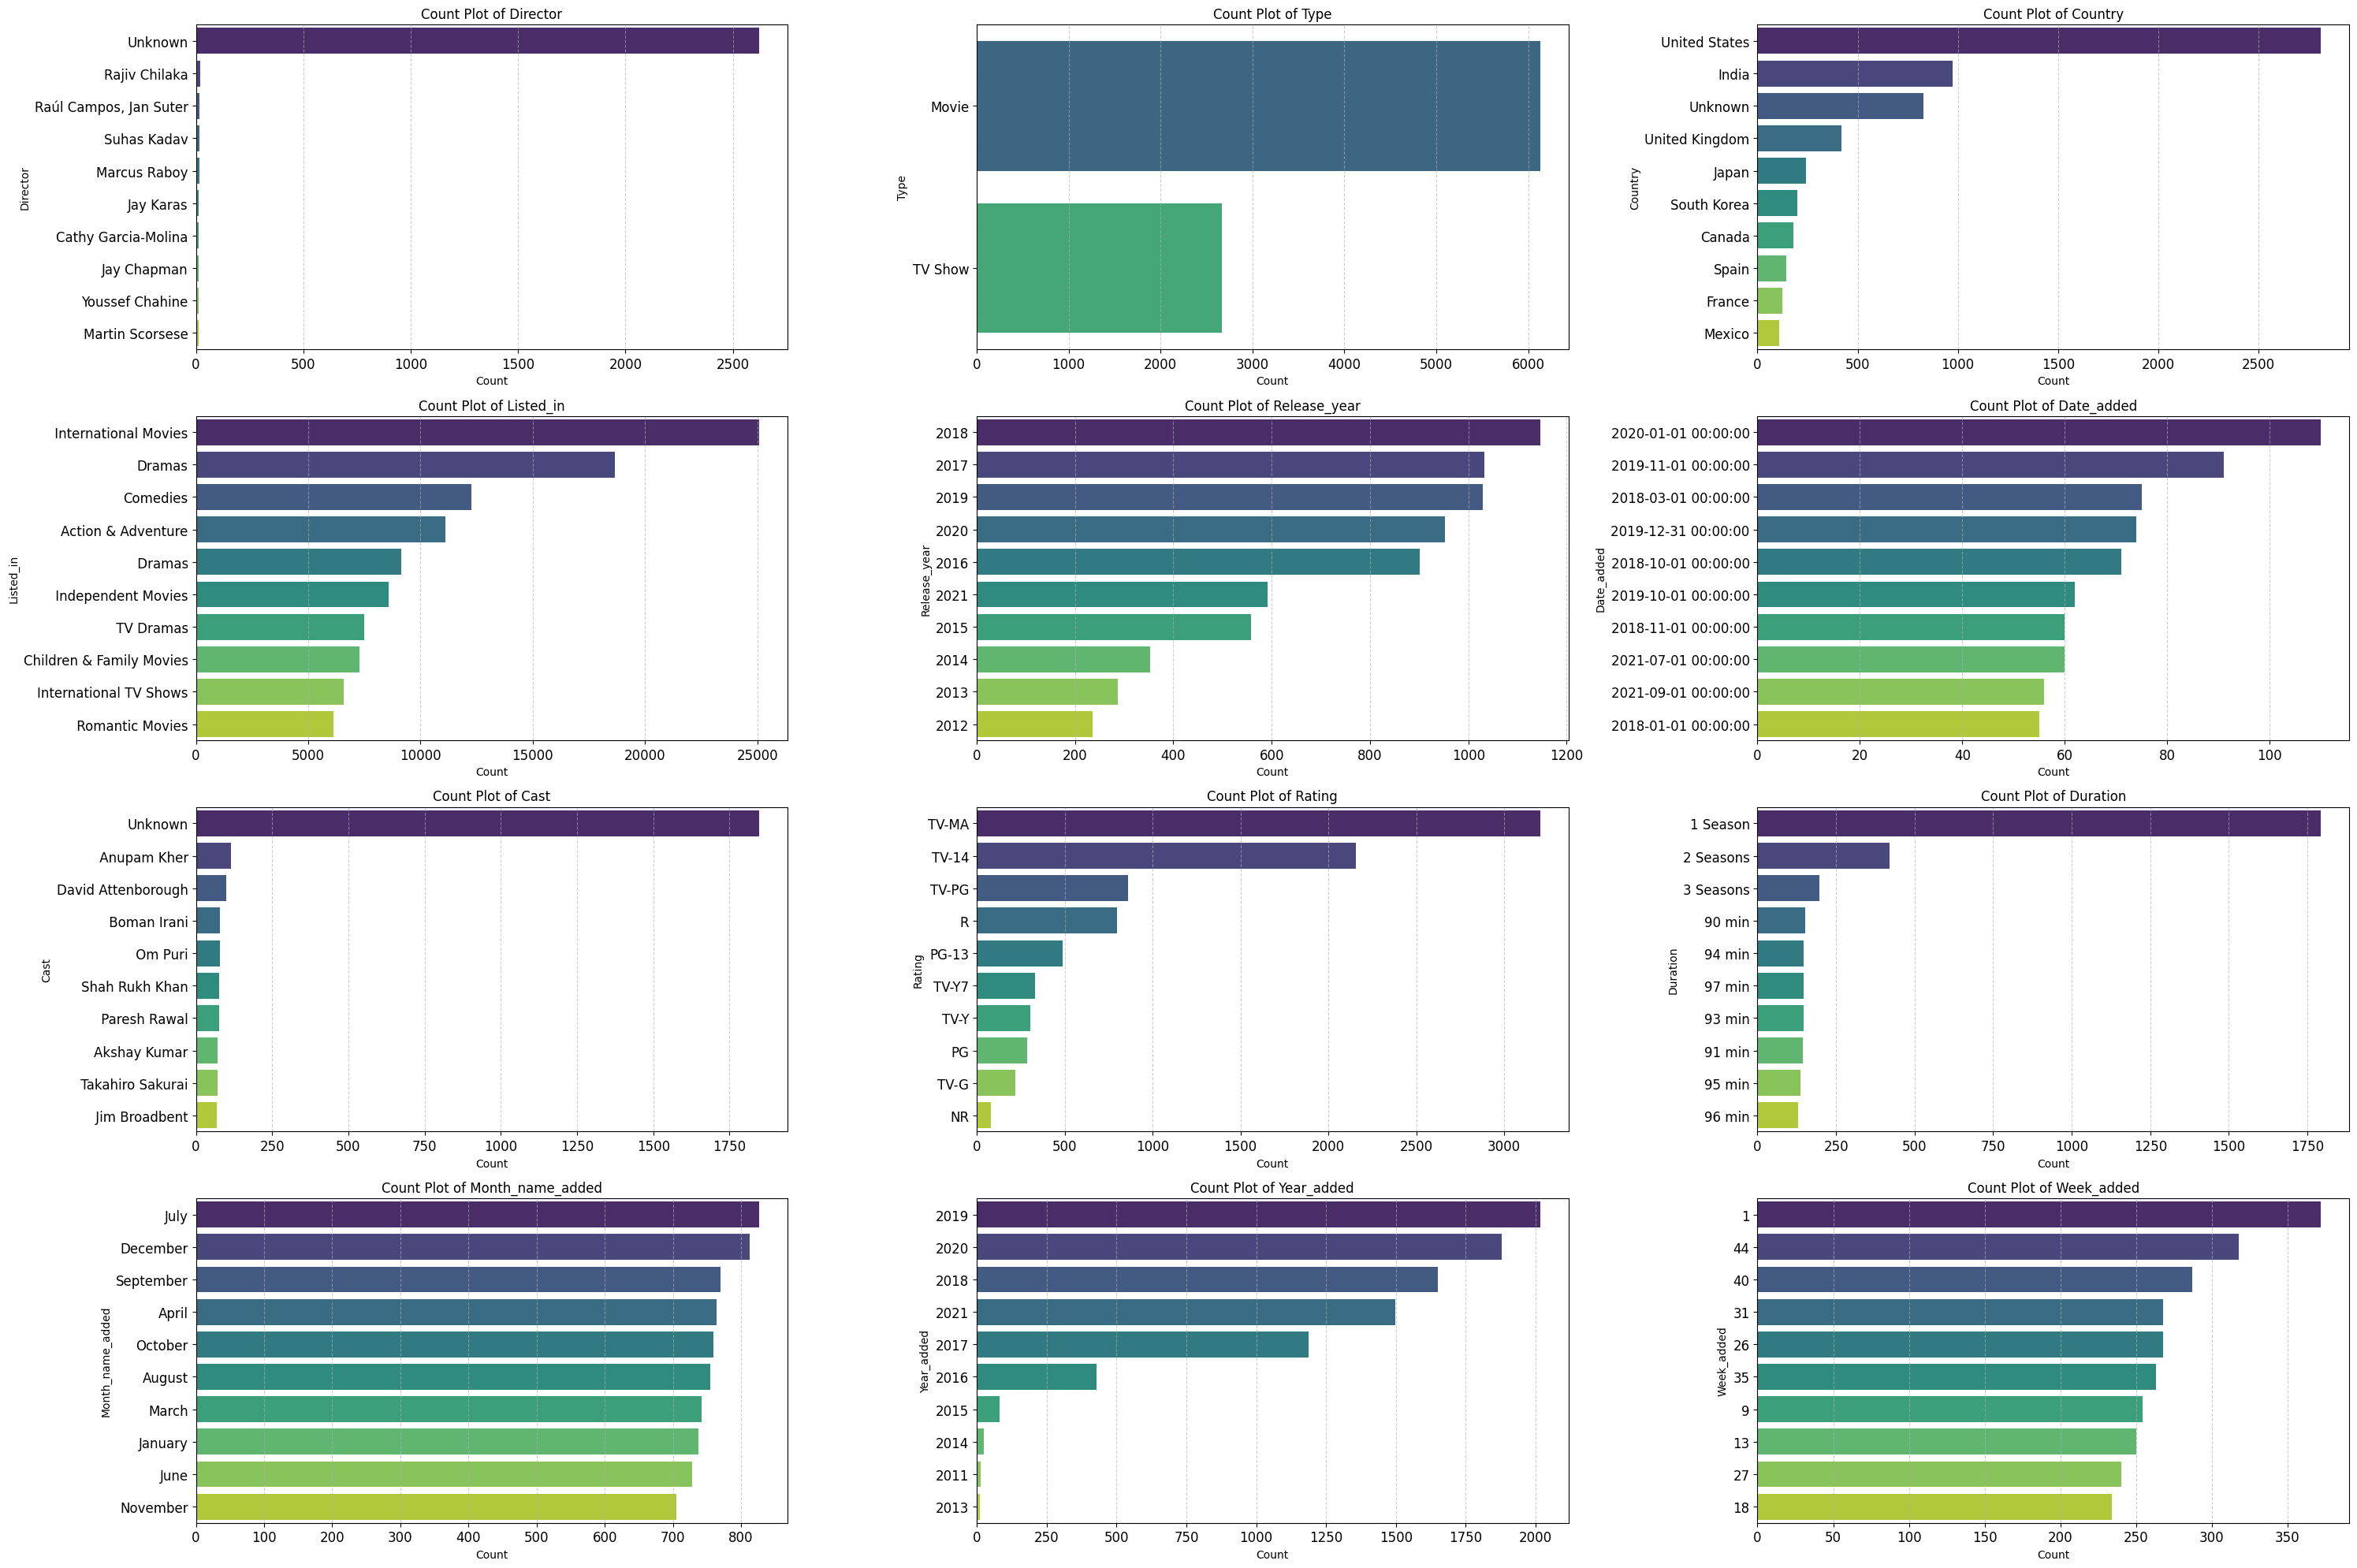

In [ ]:

categorical_columns = ['director', 'type', 'country', 'listed_in', 'release_year', 'date_added', 'cast', 'rating', 'duration','month_name_added','year_added','week_added']

fig, axes = plt.subplots(4, 3, figsize=(30, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
  if column in ['cast','listed_in']:
    order = unnestedData[column].value_counts().index[:10]
    sns.countplot(y=unnestedData[column], order=order, ax=axes[i], palette='viridis')
  else:
    order = df_netflix[column].value_counts().index[:10]
    sns.countplot(y=df_netflix[column], order=order, ax=axes[i], palette='viridis')
  axes[i].set_title(f'Count Plot of {column.capitalize()}')
  axes[i].set_xlabel('Count')
  axes[i].set_ylabel(column.capitalize())
  axes[i].tick_params(axis='y', labelsize=12)
  axes[i].tick_params(axis='x', labelsize=12)
  axes[i].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



The code generates a 4x3 grid of count plots for the **top 10 frequent values in each of the specified categorical columns** from the 'unnestedData' DataFrame. Using Seaborn and Matplotlib, the visualizations are customized for clarity: a 'viridis' color palette is applied, font sizes are increased, and grid lines are added on the x-axis. The resulting grid offers a comprehensive view of the distribution of top values across diverse categorical columns, including **director, type, country, listed_in, release_year, date_added, cast, rating, duration, month_name_added, year_added, and week_added.**

**2. Comparison of TV Shows vs Movies**

**A.Number of movies produced in each country and pick the top 10
countries.**

In [ ]:
movies = df_netflix[df_netflix["type"]=="Movie"]
movies_count = movies["type"].groupby(by=movies["country"]).count()
movies_count = movies_count.sort_values(ascending = False).head(10)
print(movies_count)


country
United States     2058
India              893
Unknown            440
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Name: type, dtype: int64


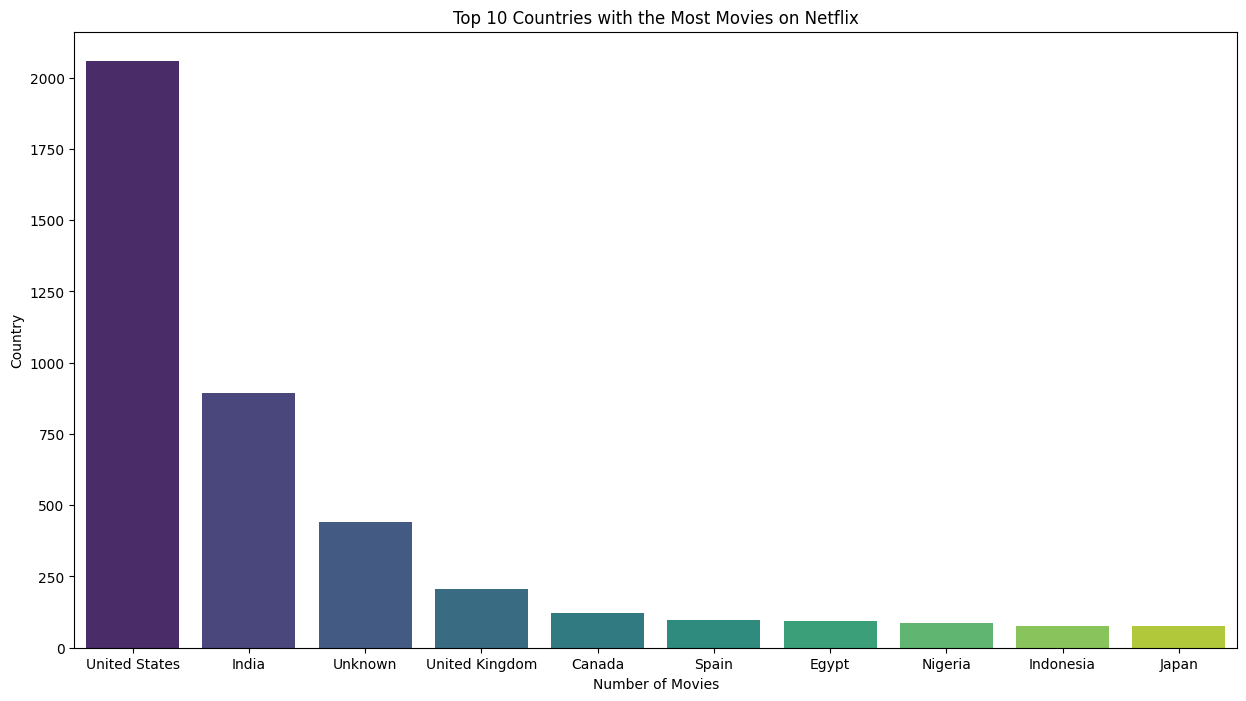

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(y=movies_count.values, x=movies_count.index, palette="viridis")  # You can choose a different palette
plt.title("Top 10 Countries with the Most Movies on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

**Insights:**

The data indicates that the **United States has the highest number of movies** available on Netflix  with a count of **2058**
This suggests a significant dominance of content originating from the United States on the platform.

**India is the second-highest contributor to the Netflix library**, with **893** movies. This highlights the global reach of the platform and its efforts to provide diverse content from various regions.

The presence of **'Unknown' as a category with 440 movies** may indicate that some entries lack proper categorization or information regarding the country of origin. Further exploration and categorization could enhance the accuracy of the data.

**B.Number of TV Shows produced in each country and pick the top 10 countries.**

In [ ]:
tv_shows = df_netflix[df_netflix["type"]=='TV Show']
tv_shows_count = tv_shows["type"].groupby(by=tv_shows["country"]).count()
tv_shows_count = tv_shows_count.sort_values(ascending = False).head(10)
print(tv_shows_count)

country
United States     754
Unknown           390
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: type, dtype: int64


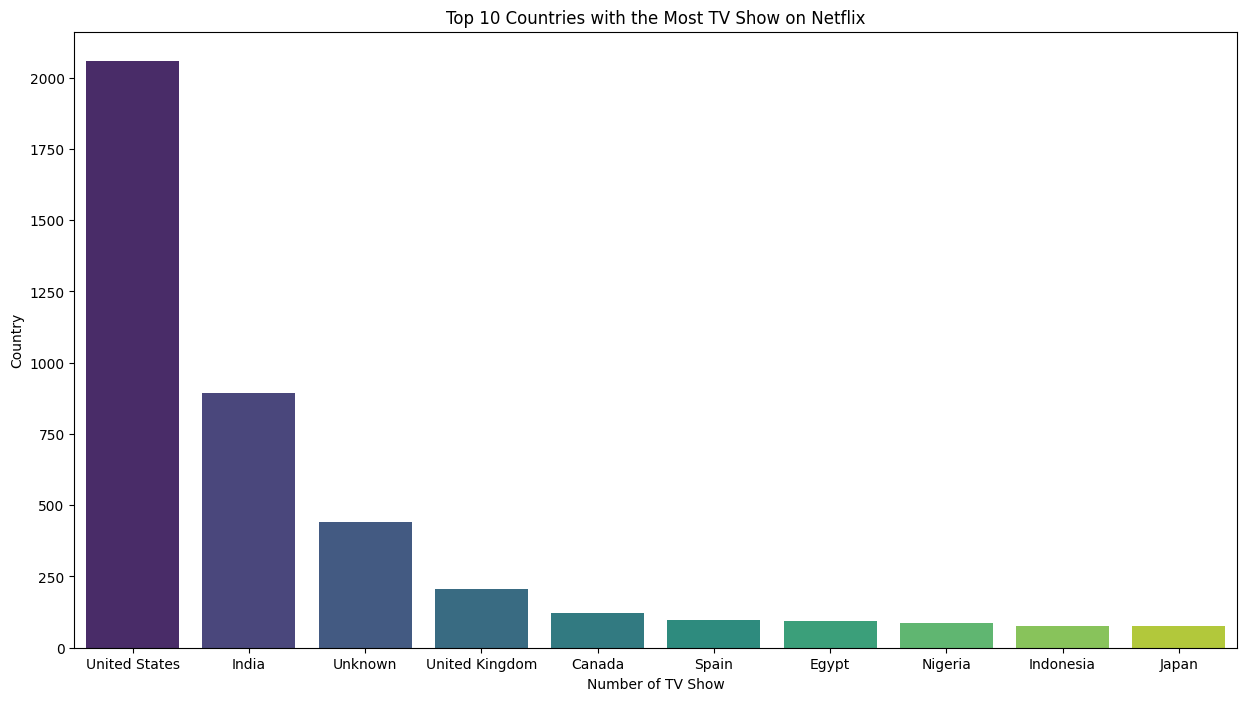

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(y=movies_count.values, x=movies_count.index, palette="viridis")
plt.title("Top 10 Countries with the Most TV Show on Netflix")
plt.xlabel("Number of TV Show")
plt.ylabel("Country")
plt.show()

**Insights:**

Similar to the movie data, the **United States is the leading contributor** to the TV show library on Netflix, with **754 TV shows**. This reiterates the strong presence of American content on the platform.

The presence of **'Unknown' as a category with 390 TV shows** indicates that, similar to movies, there is some content without proper categorization or information regarding the country of origin. Exploring and categorizing this data could enhance accuracy.

**The United Kingdom, Japan, South Korea, and Taiwan are significant contributors, reflecting the inclusion of TV shows from Europe and Asia**. This aligns with Netflix's strategy to offer diverse content from various regions.

While **India is a major contributor to movies, it has a relatively lower representation in TV shows, with 79 entries.** This suggests a difference in the content preferences or availability between movies and TV shows for the Indian market.

**3.Best time to launch a Movie or TV Show**

**A.Best week to release the TV-Show or the movie in Netflix**

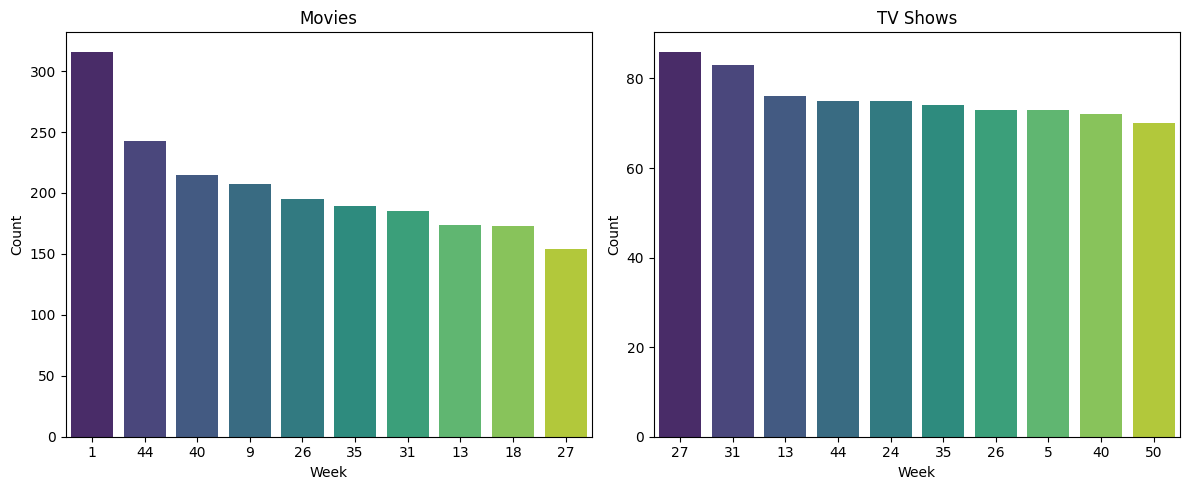

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


movie_counts = df_netflix[df_netflix['type'] == 'Movie']['week_added'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=movie_counts.index, y=movie_counts, order=movie_counts.index, palette="viridis", ax=axes[0])
axes[0].set_title('Movies')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Count')


tv_show_counts = df_netflix[df_netflix['type'] == 'TV Show']['week_added'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=tv_show_counts.index, y=tv_show_counts, order=tv_show_counts.index, palette="viridis", ax=axes[1])
axes[1].set_title('TV Shows')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()


**Best week to release the TV-Show or the movie in Netflix**

**Insights For Movies**

**Week 1** stands out significantly with the **highest count of 316 releases**. This could be due to the beginning of the year, where content providers might aim to start the year with a substantial number of releases.**So Best week to release the Movie is Very 1st Week of the Year.**

**Insights For TV Shows**

**Weeks 27 and 31 stand out with 86 and 83 TV show releases**, respectively. This suggests a pattern of higher TV show activity during these weeks.**So, week 27 and 31 are best week to release TV shows.**

**B.Best month to release the TV-Show or  movie.**

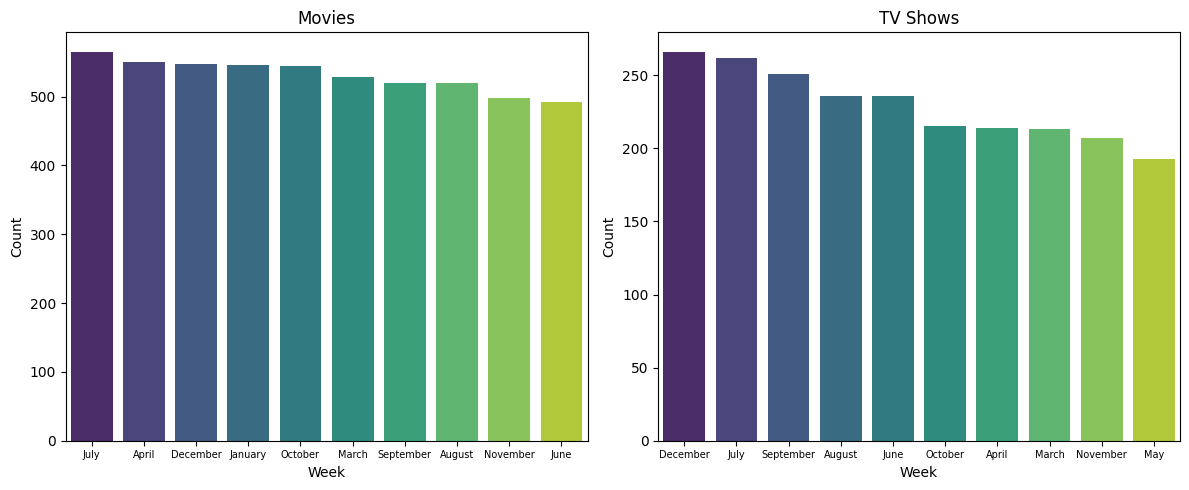

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


movie_counts = df_netflix[df_netflix['type'] == 'Movie']['month_name_added'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=movie_counts.index, y=movie_counts, order=movie_counts.index, palette="viridis", ax=axes[0])
axes[0].set_title('Movies')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', labelsize=7)


tv_show_counts = df_netflix[df_netflix['type'] == 'TV Show']['month_name_added'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=tv_show_counts.index, y=tv_show_counts, order=tv_show_counts.index, palette="viridis", ax=axes[1])
axes[1].set_title('TV Shows')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', labelsize=7)


plt.tight_layout()
plt.show()

**Best month to release the TV-Show or  movie**

**Insights For Movies:**

**July stands out as the month with the highest movie releases, with 565 movies**. This could be influenced by factors such as summer blockbuster releases or specific industry events.**Best Month to release Movie is July**.

**Insights For TV Shows:**

**TV show releases peak in December**, aligning with holiday viewing trends. Strong activity persists during summer months (July, June, August), and surprisingly, significant releases continue in September and August, indicating a strategic, year-round approach to content distribution.**So, Best month to release TV shows are December and July.**

**Common Trends:**

**July and December stands out as a significant month for both TV shows and movies**. This aligns with the broader industry practice of releasing major content during the summer when audience engagement tends to be higher. Particularly,December Counts indicating a shared trend of capitalizing on the holiday season.




**4.Analysis of actors/directors of different types of shows/movies.**

**A.Analysis of actors of different types of shows/movies.**

In [ ]:
unnestedData.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,September,2021,38
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,September,2021,38


In [ ]:
unnestedData["cast"] = unnestedData["cast"].str.strip()
unnestedData_filtered = unnestedData[unnestedData['cast'] != "Unknown"]
unique_cast_titles_count = unnestedData_filtered.groupby('cast')['show_id'].nunique().sort_values(ascending=False).head(10)
unique_cast_titles_count


cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: show_id, dtype: int64

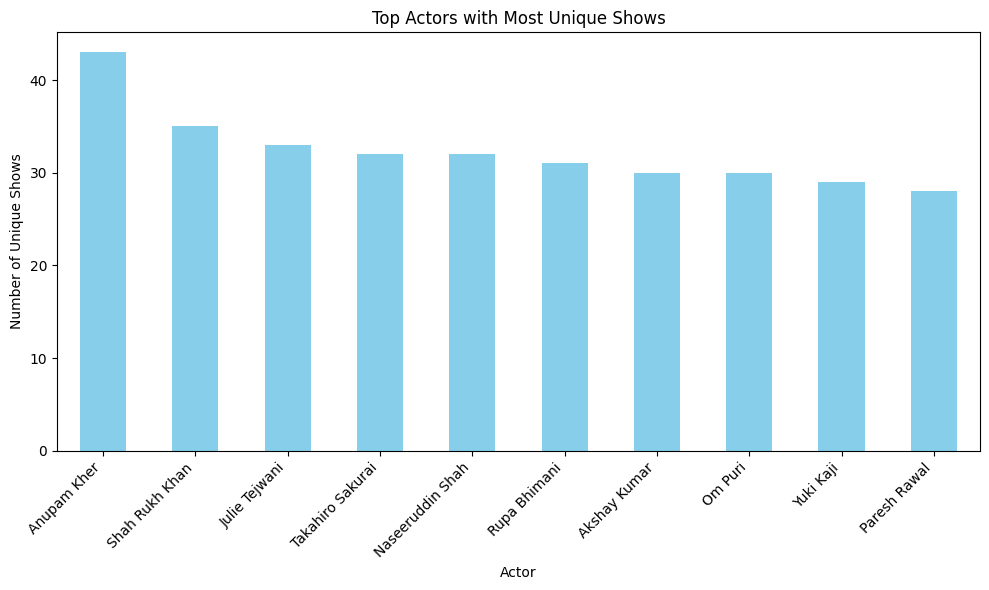

In [ ]:
plt.figure(figsize=(10, 6))
unique_cast_titles_count.plot(kind='bar', color="skyblue")
plt.title('Top Actors with Most Unique Shows')
plt.xlabel('Actor')
plt.ylabel('Number of Unique Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The top actors with the most unique shows in the dataset are **led by Anupam Kher, who has appeared in 43 distinct shows**, followed closely by **Shah Rukh Khan with 35 unique shows**.

**B.Analysis of director of different types of shows/movies.**

In [ ]:
unnestedData["director"] = unnestedData["director"].str.strip()
unnestedData_filtered = unnestedData[unnestedData['director'] != "Unknown"]
unique_director_titles_count = unnestedData_filtered.groupby('director')['show_id'].nunique().sort_values(ascending=False).head(10)
unique_director_titles_count

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: show_id, dtype: int64

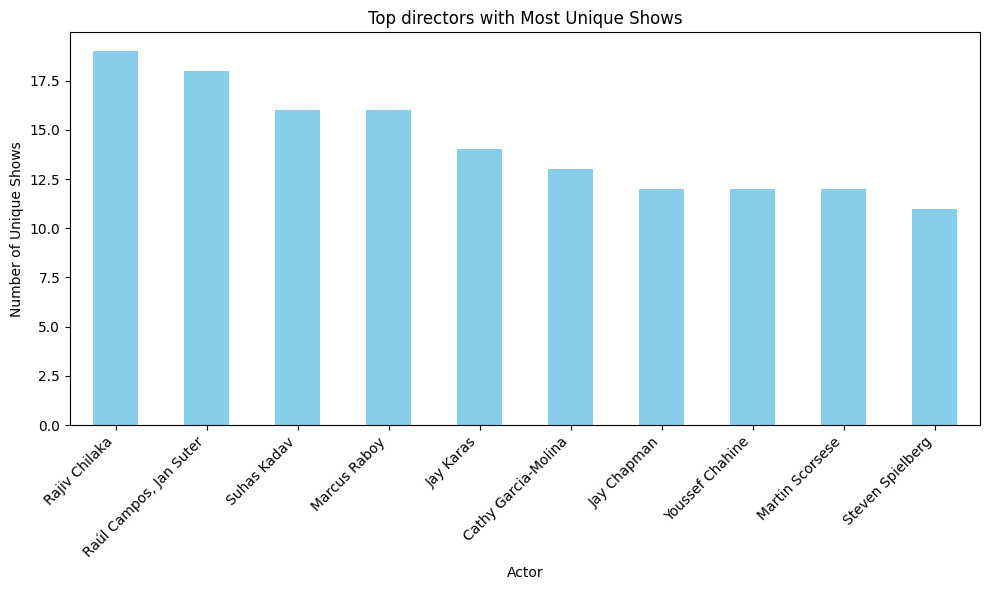

In [ ]:
plt.figure(figsize=(10, 6))
unique_director_titles_count.plot(kind='bar', color="skyblue")
plt.title('Top directors with Most Unique Shows')
plt.xlabel('Actor')
plt.ylabel('Number of Unique Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Rajiv Chilaka, the creator of "Chhota Bheem," stands out as the top director with 19 movies on Netflix**, showcasing the enduring popularity of the beloved animated series. **Raúl Campos and Jan Suter follow closely with 18 movies**, emphasizing diverse directorial contributions to the platform's content. The list includes **notable directors such as Martin Scorsese and Steven Spielberg**, reflecting a mix of both renowned and prolific creators in Netflix's library.








**Which genre movies are more popular or produced more?**

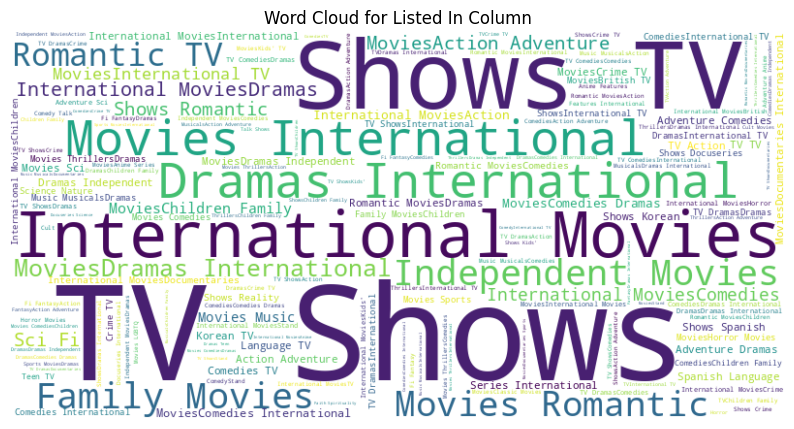

In [ ]:

from wordcloud import WordCloud

all_text =""
genres_list = df_netflix["listed_in"].str.split(",")
for lists in genres_list :
  text= ','.join(lists)
  all_text += text
word_frequencies = {}
for word in all_text.split(","):
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(all_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Listed In Column')
plt.show()

sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))



In [ ]:
for key, value in list(sorted_word_frequencies.items())[:10]:
    print(f"{key}: {value}")

 International Movies: 838
 Dramas: 654
 Independent Movies: 424
 International TV Shows: 355
 International MoviesDramas: 325
 International MoviesComedies: 279
 Romantic TV Shows: 223
 Comedies: 200
 International MoviesAction & Adventure: 177
 International MoviesInternational TV Shows: 156


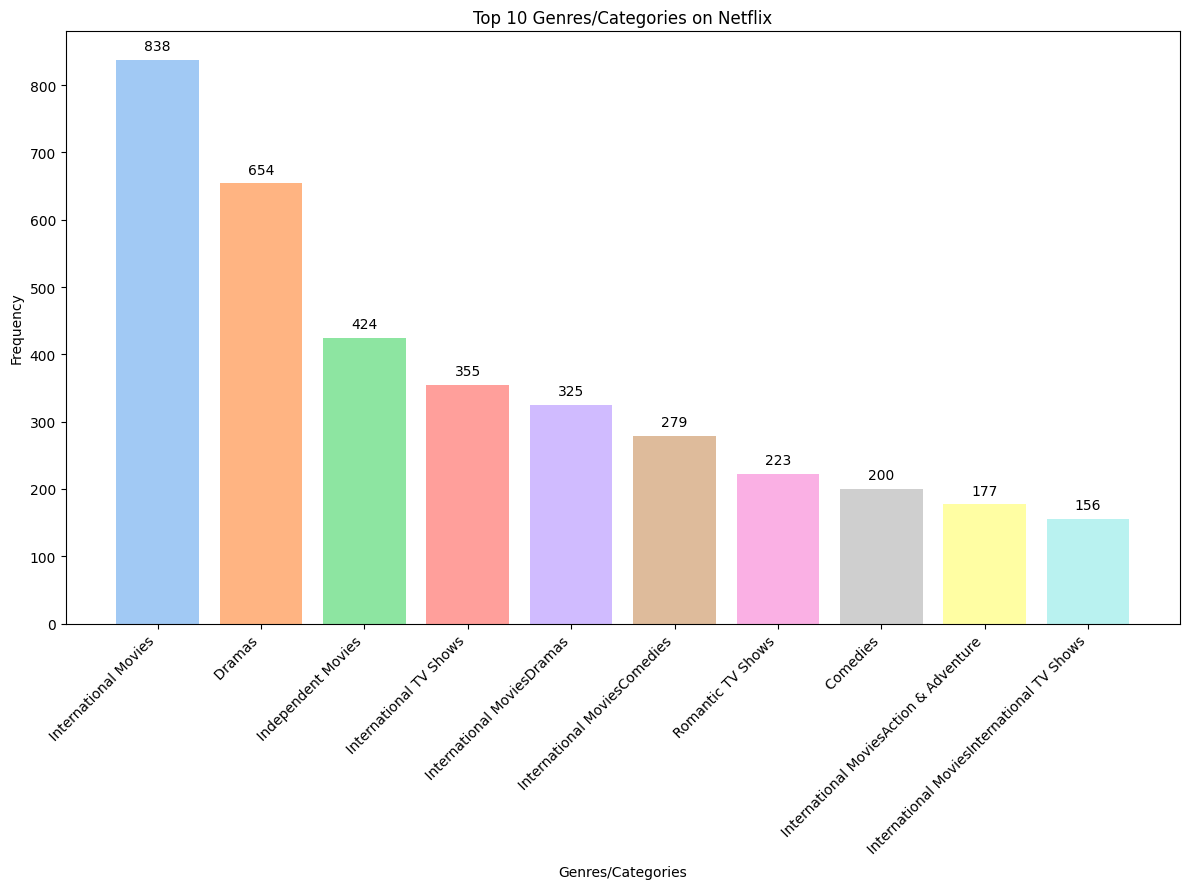

In [ ]:
top_genres = list(sorted_word_frequencies.keys())[:10]
genre_frequencies = [sorted_word_frequencies[genre] for genre in top_genres]

colors = sns.color_palette("pastel")

# Create a bar plot with custom colors
plt.figure(figsize=(12, 9))
bars = plt.bar(top_genres, genre_frequencies, color=colors)

# Add data labels on top of each bar
for bar, frequency in zip(bars, genre_frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(frequency), ha='center', va='bottom')

plt.title('Top 10 Genres/Categories on Netflix')
plt.xlabel('Genres/Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top genres on Netflix reveal a diverse palette of viewer preferences. **International Movies** take the lead, showcasing a global appetite for cinema from various regions. Dramas maintain a strong presence, emphasizing the enduring appeal of emotionally rich narratives.

**Additional Insights:**

Surprisingly, animations and children's content do not secure a spot in the top 10 genres on Netflix, suggesting a diversified viewer base with varied preferences.

**6.Find After how many days the movie will be added to Netflix after the release of
the movie.**

In [ ]:
days_difference = (df_netflix['date_added'] - pd.to_datetime(df_netflix['release_year'], format='%Y')).dt.days


mode_days_difference = days_difference.mode()


print("Mode of days difference:", mode_days_difference)

Mode of days difference: 0    334
dtype: int64


The **"release_year" column contains only the year information**. As a result, attempting to **calculate differences in days may not be meaningful** because it lacks the specific day and month details.

**Additional Insights and Recommendations:**

In [ ]:

df_netflix = df_netflix.dropna(subset=['director', 'release_year', 'type'])
df_netflix = df_netflix[df_netflix['director'] != 'Unknown']

# Calculate the number of unique years each director has contributed to
director_years = df_netflix.groupby('director')['release_year'].nunique().sort_values(ascending=False)


# Get the most active director in terms of unique years
most_active_director = director_years.idxmax()
most_active_years = director_years.max()


# Count the number of films for the most active director
most_active_films_count = df_netflix[df_netflix['director'] == most_active_director].shape[0]

print("Most Active Director: ",most_active_director)
print("Most Active Years: ",most_active_years)
print("Most Active Flims Count : ",most_active_films_count)



Most Active Director:  Youssef Chahine
Most Active Years:  12
Most Active Flims Count :  12


The most active director is **'Youssef Chahine'** with **12 years of film contributions on Netflix**.
He has contributed to **12 films**.

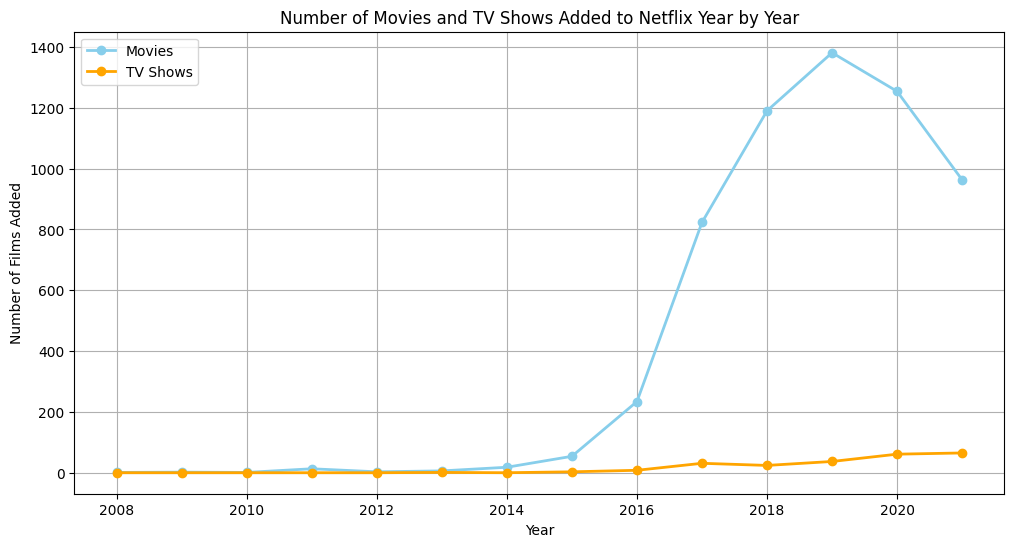

In [ ]:
films_added_per_year = df_netflix.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Plot line plots for movies and TV shows
plt.figure(figsize=(12, 6))
plt.plot(films_added_per_year.index, films_added_per_year['Movie'], marker='o', label='Movies', color='skyblue', linestyle='-', linewidth=2)
plt.plot(films_added_per_year.index, films_added_per_year['TV Show'], marker='o', label='TV Shows', color='orange', linestyle='-', linewidth=2)

plt.title('Number of Movies and TV Shows Added to Netflix Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Films Added')
plt.legend()
plt.grid(True)
plt.show()

**During the years 2018 to 2021, there was a notable surge in the number of movies added to Netflix**, indicating a significant expansion of content offerings. **This period coincided with the global COVID-19 pandemic, suggesting a potential response to increased demand for digital entertainment.** The rise in content reflects Netflix's strategy to cater to evolving consumer behaviors during these challenging times. But TV Shows seems to be straight line so they added almost equal number of TV shows in Netflix



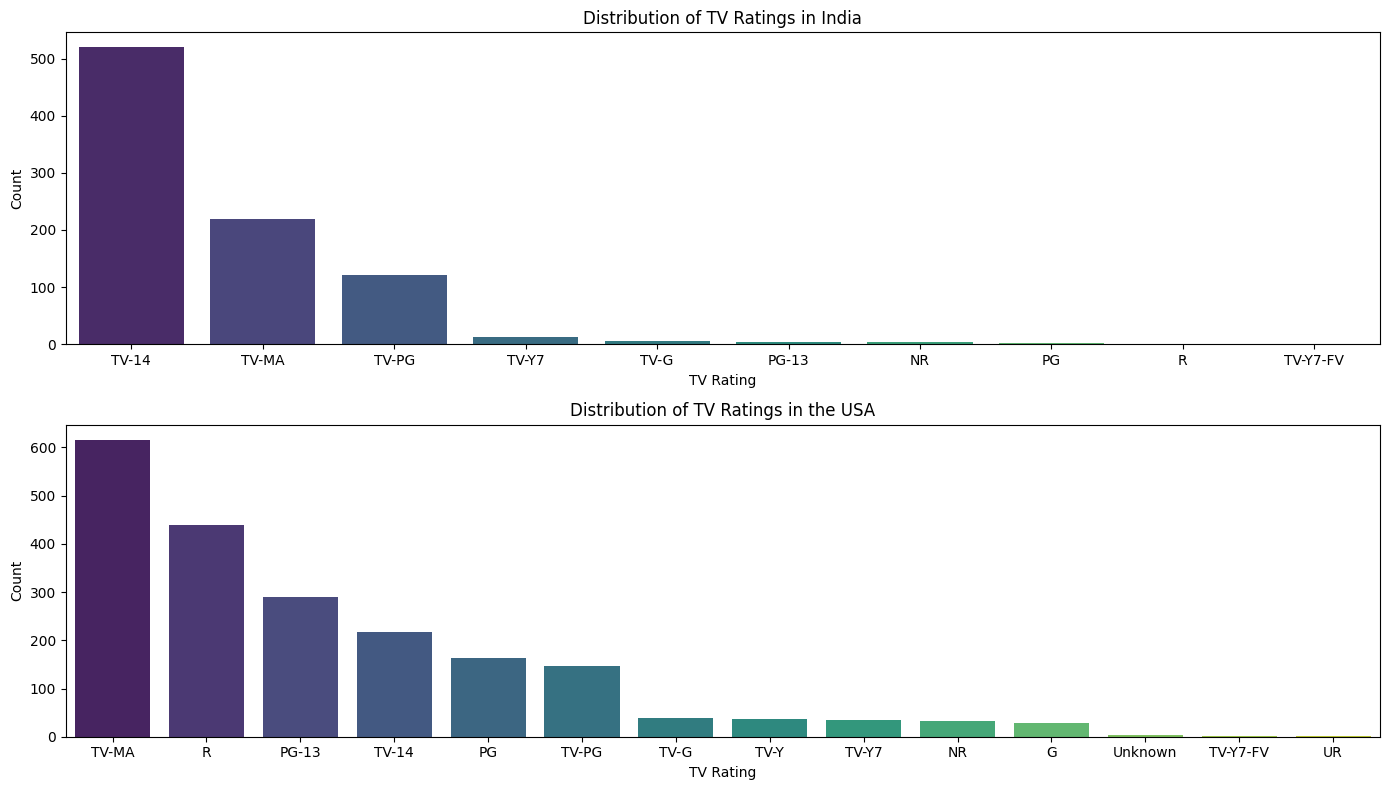

In [ ]:
india_df = df_netflix[df_netflix['country'] == 'India']


# Filter the DataFrame for films and TV shows produced in the USA
usa_df = df_netflix[df_netflix['country'] == 'United States']


# Plot bar plots for TV ratings in India and the USA
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.countplot(x='rating', data=india_df, order=india_df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of TV Ratings in India')
plt.xlabel('TV Rating')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.countplot(x='rating', data=usa_df, order=usa_df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of TV Ratings in the USA')
plt.xlabel('TV Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**India:**

-Predominant TV ratings include 'TV-14,' 'TV-MA,' and 'TV-PG.'

-'TV-MA' is the top-rated category, indicating mature content for adults.

-Distribution is relatively concentrated in a few primary ratings.

**USA:**

-'TV-MA' is the dominant rating in the USA.

-Presence of 'R' and 'PG-13,' reflecting a mix of content for older audiences.

-The distribution is more diverse across different ratings compared to India.

**General Observations:**

-Both countries have a significant presence of 'TV-MA' content for mature
 audiences.

-India's distribution is more concentrated, while the USA has a broader range  
 of ratings.

-Limited presence of 'TV-Y7-FV' indicates minimal content with fantasy violence
 for children in both countries.

# **Recommendations for Netflix Content Strategy:**

**Diversify Content Categorization:**

Investigate and categorize entries labeled as 'Unknown' in the country category to enhance accuracy in content origin.
**Strategic Release Planning:**

Consider launching movies in the first week of the year, taking advantage of the observed higher release count. For TV shows, focus on weeks 27 and 31 for optimal release timing.
**Month-Specific Content Strategy:**

Plan major movie releases in July, leveraging the peak in movie releases during this month. For TV shows, prioritize December and July as strategic months.

**Leverage Common Trends:**

Capitalize on the shared trend of significant releases in July and December, aligning with industry practices of major content launches during the summer and holiday seasons.

**Highlight Top Actors and Directors:**

Feature shows starring top actors like Anupam Kher and Shah Rukh Khan. Promote content directed by prolific creators such as Rajiv Chilaka, Raúl Campos, and Jan Suter.

**Diversity in Genres:**

While international movies and dramas are popular, explore opportunities to promote animations and children's content for a diversified viewer base.

**Monitor TV Show and Movie Trends:**

Stay informed about trends in TV show and movie additions. Adjust the content acquisition strategy based on shifts in user preferences.

**Address Viewer Ratings:**

Cater to viewer preferences in India ('TV-14,' 'TV-MA,' and 'TV-PG') and the USA ('TV-MA' with a diverse range of ratings).

**Adapt to Viewer Preferences During Challenging Times:**

Continuously monitor viewer behavior, especially during challenging times, and adapt the content strategy accordingly.


**Global Reach and Local Appeal**:

Balance global reach with local appeal. Continue efforts to provide diverse content from various regions, as seen in contributions from the United Kingdom, Japan, South Korea, Taiwan, and India.